In [14]:
from qiskit import __version__

print(__version__)

1.3.3


In [15]:
import numpy as np

x = np.random.randint(0,2)
print(x)


1


8


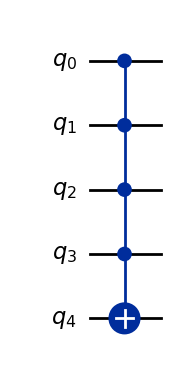

In [16]:
from qiskit import QuantumCircuit

num_qubits = 4
print(2**num_qubits // 2)
qc = QuantumCircuit(num_qubits+1)

if np.random.randint(0,2):
    # # Flip output qubit with 50% chance
    qc.x(num_qubits)
# if np.random.randint(0,2):
#     # return constant circuit with 50% chance
#     return qc

# multi-controlled NOT gate or Toffoli gate for multiple controls
qc.mcx(list(range(num_qubits)), num_qubits)
display(qc.draw('mpl'))


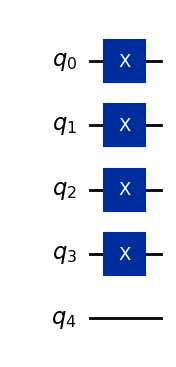

In [17]:
qc = QuantumCircuit(num_qubits+1)
qc.x(range(num_qubits))
display(qc.draw('mpl'))

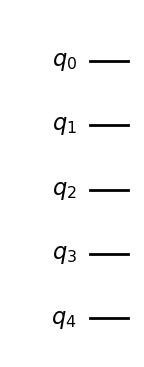

In [18]:
qc = QuantumCircuit(num_qubits+1)
display(qc.draw('mpl'))

In [101]:
# A Simple example of Deutsh-Jozsa Oracle function 
# f(x) = 0 or f(x) = 1 (constant) with 50% and 
# f(x) = x_1 xor x_2 alo called multi-controlled NOT gate or Toffoli gate for multiple controls (balanced) with 50%

def deutsch_jozsa_function(num_qubits: int):
    f = QuantumCircuit(num_qubits+1)

    if np.random.randint(0, 2):
        if np.random.randint(0, 2):
            f.x(range(num_qubits))
            #f.x(num_qubits+1)
        else:
            return f
    else:
        #for i in range(num_qubits):
        #    f.cx(i, num_qubits)
        f.mcx(list(range(num_qubits)), num_qubits)
    return f

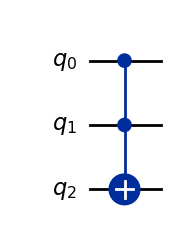

In [102]:
# Deutsch-Jozsa function for f(x) = 0 or 1 or x_1 xor x_2
display(deutsch_jozsa_function(2).draw('mpl'))

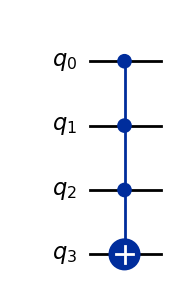

In [103]:
# Deutsch-Jozsa function for f(x) = 0 or 1 or x_1 xor x_2
display(deutsch_jozsa_function(3).draw('mpl'))

In [104]:
def compile_circuit(f: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = f.num_qubits - 1
    qc = QuantumCircuit(n+1, n)

    # Step 1 (Rotate): Initialize the output qubit in |1> and apply Hadamard gates
    qc.x(n)
    qc.h(range(n+1))
    qc.barrier()
    
    # Step 2 (compute): Oracle for f(x1, x2) = x1 ⊕ x2 ....
    qc.compose(f, inplace=True)
    qc.barrier()
    
    # Step 3 (Rotate): Apply Hadamard to first n qubits
    qc.h(range(n))
    
    # Step 4: Measure the first n qubits
    qc.measure(range(n), range(n))

    return qc
    

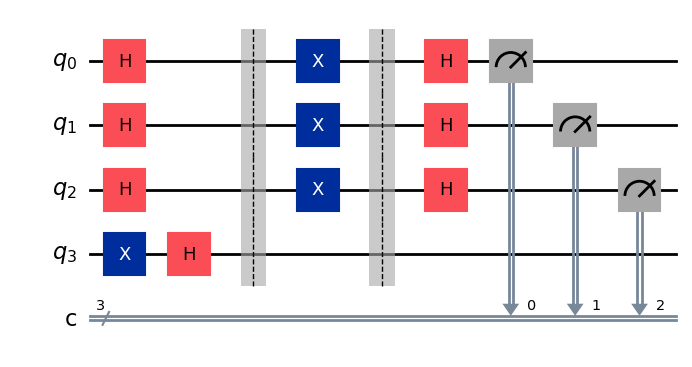

In [105]:
display(compile_circuit(deutsch_jozsa_function(3)).draw("mpl"))

In [106]:
from qiskit_aer import AerSimulator

def deutsch_jozsa_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch-Jozsa function is constant or balanced.
    """
    qc = compile_circuit(function)

    display(qc.draw('mpl'))

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()

    print(measurements)

    if "1" in measurements[0]:
        return "balanced"
    return "constant"
    

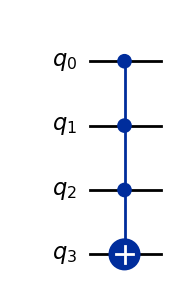

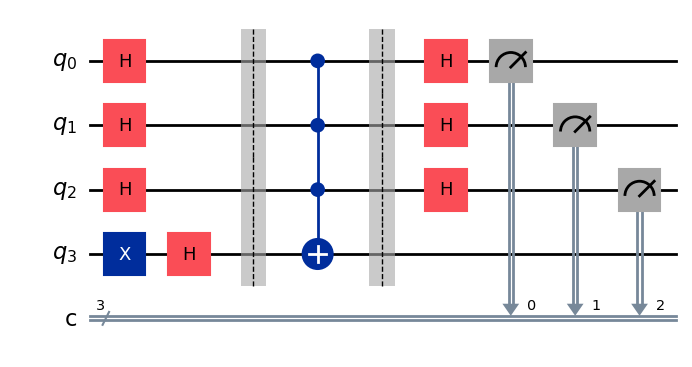

['001']


'balanced'

In [107]:
f = deutsch_jozsa_function(3)
display(f.draw('mpl'))

display(deutsch_jozsa_algorithm(f))


In [113]:
# choose half the possible input states
on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False,  # makes sure states are only sampled once
    )

print(on_states)
for state in on_states:
    print(f"{state:0b}")
    for qubit, bit in enumerate(reversed(f"{state:0b}")):
        print(qubit, bit)

[15  8  3 11  9 10  0 13]
1111
0 1
1 1
2 1
3 1
1000
0 0
1 0
2 0
3 1
11
0 1
1 1
1011
0 1
1 1
2 0
3 1
1001
0 1
1 0
2 0
3 1
1010
0 0
1 1
2 0
3 1
0
0 0
1101
0 1
1 0
2 1
3 1


In [150]:
from qiskit.quantum_info import Operator

def dj_function(num_qubits):
    """
    Create a random Deutsch-Jozsa function.
    """
    
    f = QuantumCircuit(num_qubits + 1)

    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        f.x(num_qubits)
    if np.random.randint(0, 2):
        return f
        
    # Flip output qubit with 50% chance
    on_states = np.random.choice(
        2**num_qubits,            # numbers to sample from
        2**num_qubits // 2,       # number of samples to be 
        replace = False           # makes sure states are only sampled once
    )

    def add_cx(f, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                f.x(qubit)
        return f

    # for state in on_states:
    #     f.barrier()
    #     add_cx(f, f"{state:0b}")
    #     f.mcx(list(range(num_qubits)), num_qubits)
    #     add_cx(f, f"{state:0b}")
        
    f.mcx(list(range(num_qubits)), num_qubits)

    display(Operator.from_circuit(f).draw("latex"))

    return f    

<IPython.core.display.Latex object>

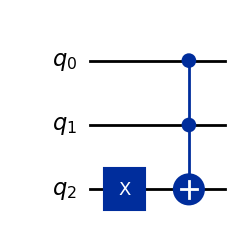

In [151]:
display(dj_function(2).draw('mpl'))

<IPython.core.display.Latex object>

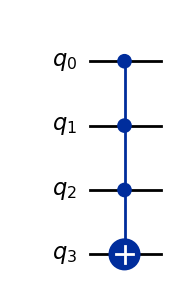

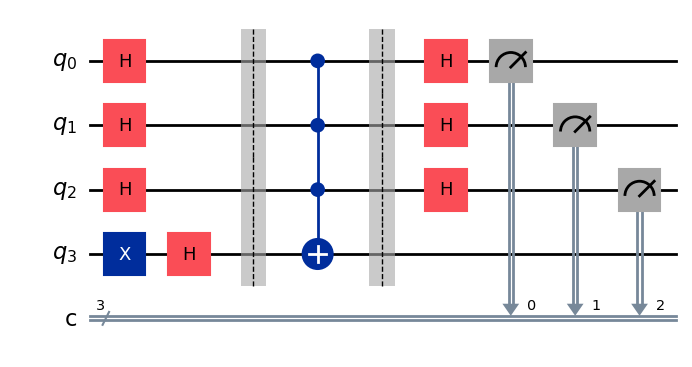

['011']


'balanced'

In [158]:
f = dj_function(3)
display(f.draw('mpl'))

display(deutsch_jozsa_algorithm(f))
